## Introduction

After an initial meeting in which you presented your first insights from the user-generated-data research project, the question comes up, if one can find more insights from the reviews and review headlines of the different airlines.
The board is especially interested to learn if there are general patterns and topics passengers debate about when flying.
The board is also interested in finding a way to measure brand equity and customer satisfaction of the competing airlines to develop an industry dashboard that tracks brand equity and customer satisfaction for the most prominent airlines.

At best, you would come up with an approach that allows tracking brand equity from various user generated content sources such as airline reviews, but also social media networks such as Twitter or Instagram.
The next day you sit down and pull all reviews available for all major airlines flying from London Heathrow and start running your analysis to answer the following questions

-   Which airlines do see more reviews than others?
-   Which common issues do customers praise when flying?
-   Which common issues do customers complain about most, when flying?
-   How does sentiment relate to customer experience?
-   How do passengers use emotions in their feedback when talking about different airlines?
-   Can we leverage the review data to build a brand equity measure?
-   Can we develop our own text-sentiment classifier to harvest airline sentiment from social media?

In [126]:
import pandas as pd

In [127]:
data=pd.read_csv("airlinereviews.csv")

In [128]:
data.head()

,Unnamed: 0,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation
0,1,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",|Very bad service and customer support. They c...,NaN,Solo Leisure,Economy Class,no
1,2,5th January 2021,Air Canada,Toronto to Mumbai,2.0,"""please refund me my money""",|I am messaging with an ardent request to refu...,NaN,Solo Leisure,Economy Class,no
2,3,5th January 2021,Air Canada,Vancouver to Toronto via Calgary,6.0,"""The main problem crops up with the IFE in the...","| From a service perspective, Air Canada is gr...",A321,Solo Leisure,Economy Class,yes
3,4,20th December 2020,Air Canada,St Lucia to Ottawa via Toronto,1.0,"""this airline is absolutely shameful""","| We returned from St-Lucia yesterday night, D...",NaN,Couple Leisure,Economy Class,no
4,5,4th December 2020,Air Canada,Ottawa to St John's,10.0,"""Air Canada came through""",|My wife and I booked flights through Flight N...,NaN,Couple Leisure,Economy Class,yes


In [129]:
data=data.iloc[:,1:]

In [130]:
data.head()

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",|Very bad service and customer support. They c...,NaN,Solo Leisure,Economy Class,no
1,5th January 2021,Air Canada,Toronto to Mumbai,2.0,"""please refund me my money""",|I am messaging with an ardent request to refu...,NaN,Solo Leisure,Economy Class,no
2,5th January 2021,Air Canada,Vancouver to Toronto via Calgary,6.0,"""The main problem crops up with the IFE in the...","| From a service perspective, Air Canada is gr...",A321,Solo Leisure,Economy Class,yes
3,20th December 2020,Air Canada,St Lucia to Ottawa via Toronto,1.0,"""this airline is absolutely shameful""","| We returned from St-Lucia yesterday night, D...",NaN,Couple Leisure,Economy Class,no
4,4th December 2020,Air Canada,Ottawa to St John's,10.0,"""Air Canada came through""",|My wife and I booked flights through Flight N...,NaN,Couple Leisure,Economy Class,yes


In [6]:
len(data)

24391

In [7]:
data['Airline'].value_counts()

United Airlines       3457
British Airways       3149
Emirates              2031
Turkish Airlines      1838
Qatar Airways         1748
Lufthansa             1694
Air Canada            1565
Etihad Airways        1524
Singapore Airlines    1278
Southwest Airlines    1182
Air France            1059
Thai Airways           875
Swiss Airlines         815
Virgin Atlantic        770
Iberia                 727
Alitalia               679
Name: Airline, dtype: int64

In [8]:
data['Airline'].value_counts().index

Index(['United Airlines', 'British Airways', 'Emirates', 'Turkish Airlines',
       'Qatar Airways', 'Lufthansa', 'Air Canada', 'Etihad Airways',
       'Singapore Airlines', 'Southwest Airlines', 'Air France',
       'Thai Airways', 'Swiss Airlines', 'Virgin Atlantic', 'Iberia',
       'Alitalia'],
      dtype='object')

The data set consists of 24391 reviews from 16 different major airlines and thus provides a sufficient level of information to base our analysis on.To explore the number of reviews per airline we can use the following code that will give us a pie chart and the relative share of reviews per airline.

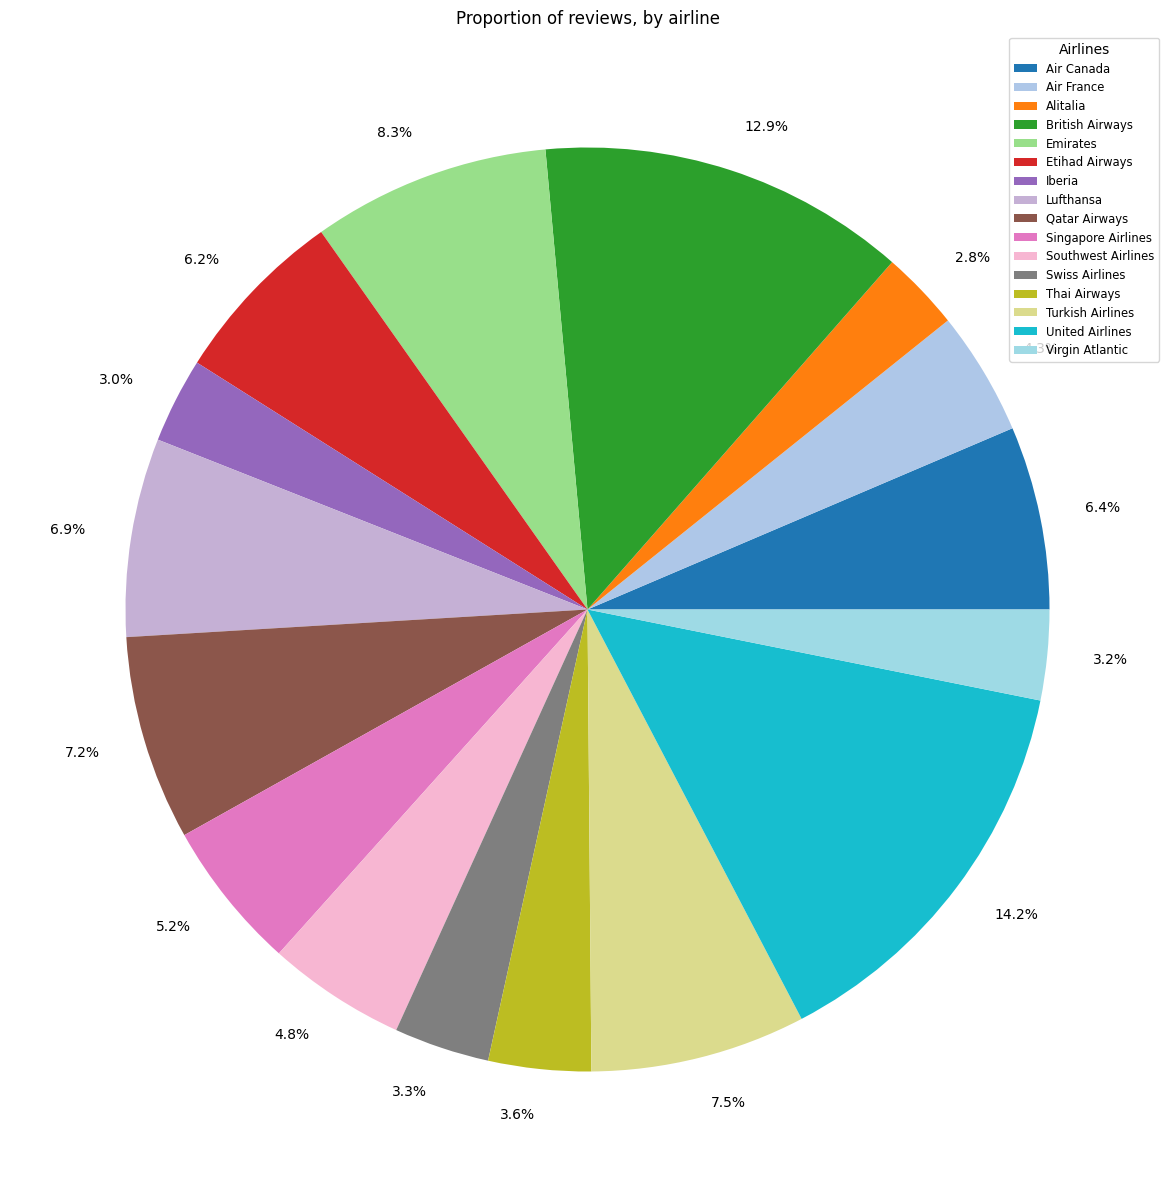

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Grouping by Airline and calculating the number of reviews
numb_rev_airline = data.groupby('Airline').size().reset_index(name='NumberofReviews')

# Calculating the percentages for the pie chart
numb_rev_airline['Percentage'] = (numb_rev_airline['NumberofReviews'] / numb_rev_airline['NumberofReviews'].sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(15,15))
plt.pie(numb_rev_airline['NumberofReviews'], labels=['{:.1f}%'.format(p) for p in numb_rev_airline['Percentage']],
        colors=plt.cm.tab20(np.linspace(0, 1, len(numb_rev_airline['NumberofReviews']))))

plt.title('Proportion of reviews, by airline')

# Adding a legend
plt.legend(numb_rev_airline['Airline'], title="Airlines", loc="upper right", bbox_to_anchor=(1, 1), fontsize='small')

plt.show()

To further understand how satisfied passengers are and to ensure that we equally base our analysis on positive and negative reviews, let us rely on the overall rating score, each review comes with.
The following code allows us to inspect boxplots for the overall rating per airline.

In [10]:
import seaborn as sns

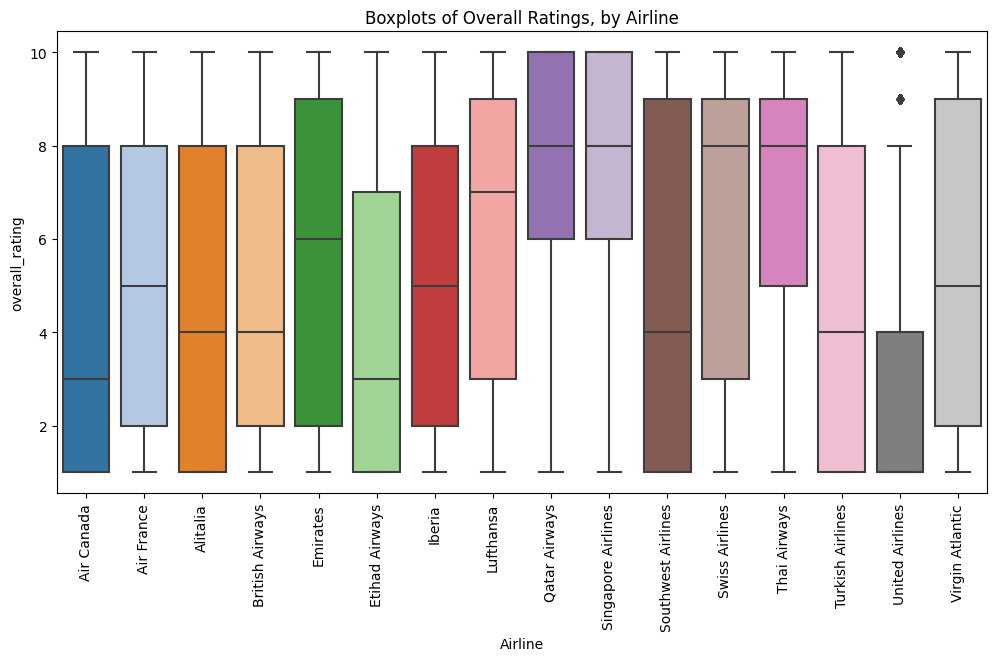

In [11]:
# Creating the plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='overall_rating', data=data, palette='tab20')
#sns.stripplot(x='Airline', y='overall_rating', data=data, color='black', size=4, jitter=0.2, alpha=0.3)

# Customizing the plot
plt.xticks(rotation=90)
plt.title('Boxplots of Overall Ratings, by Airline')
plt.show()

Boxplots allow us to easily understand the locality, spread, and skewness of numerical data.
A boxplot thus shows the mean value, indicates outliers, as well as the quartiles and the range between these.
Looking at e.g.
Turkish Airlines we can see that the mean rating is somewhere around 4.8.
The upper quartile is around 7.8 (close to the mean rating of Thai Airways).
The lower quartile goes down to one.

To better understand and inspect the mean ratings we can also rely on a barchart plot which we obtain with the following code


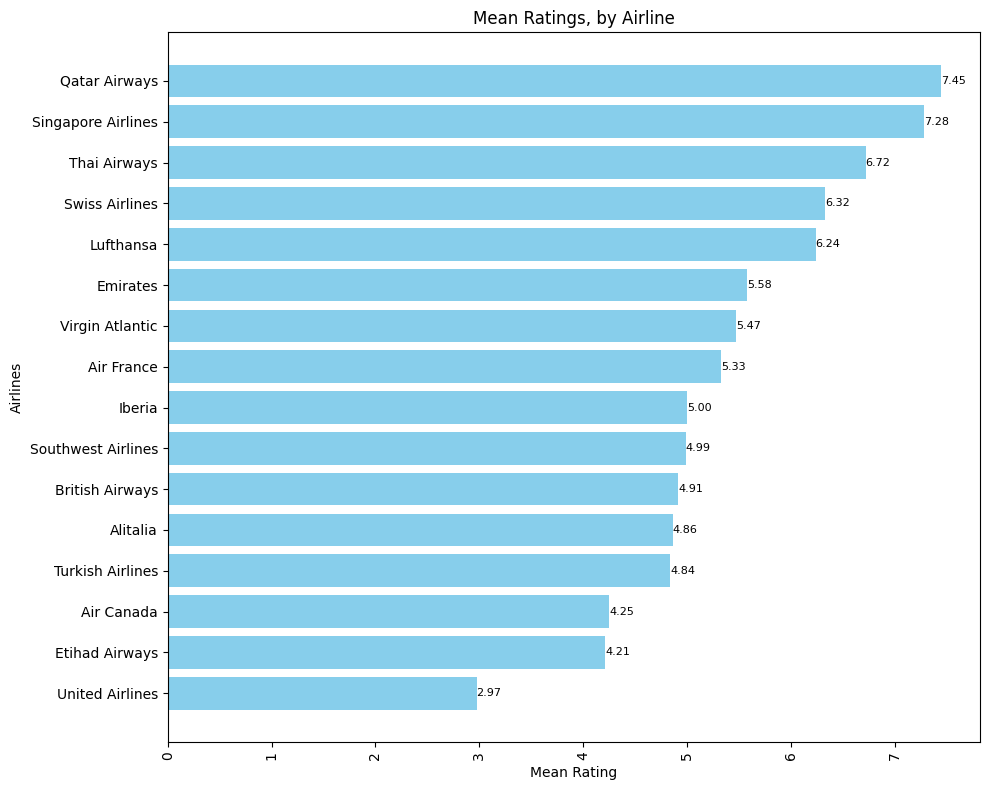

In [12]:
# Calculate the mean rating per airline, removing NA values
mean_rating_airline = data.groupby('Airline')['overall_rating'].mean().reset_index(name='MeanRating')

# Sort the DataFrame based on MeanRating for the reordering effect
mean_rating_airline_sorted = mean_rating_airline.sort_values('MeanRating', ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(mean_rating_airline_sorted['Airline'], mean_rating_airline_sorted['MeanRating'], color='skyblue')

# Add the text labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),       # x-coordinate position of text
        bar.get_y() + bar.get_height() / 2,  # y-coordinate position of text
        f'{bar.get_width():.2f}',  # bar label, formatted to 2 decimals
        va='center',  # center vertically
        ha='left',    # align horizontally
        color='black',
        size=8
    )

# Add labels and title
plt.xlabel('Mean Rating')
plt.ylabel('Airlines')
plt.title('Mean Ratings, by Airline')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Both, the boxplots as well as the bar chart, indicate that we have enough variation in our reviews to continue with our analysis.
We can thus start with trying to understand how favorably (or unfavorably) passengers write about an airline.

### Sentiment Analysis

Let us first see how Top-Down Sentiment Classifiers work and how we can extract emotion and sentiment information with the help of the NRC dictionary.

In [13]:
len(data)

24391

In [14]:
data.head()

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",|Very bad service and customer support. They c...,NaN,Solo Leisure,Economy Class,no
1,5th January 2021,Air Canada,Toronto to Mumbai,2.0,"""please refund me my money""",|I am messaging with an ardent request to refu...,NaN,Solo Leisure,Economy Class,no
2,5th January 2021,Air Canada,Vancouver to Toronto via Calgary,6.0,"""The main problem crops up with the IFE in the...","| From a service perspective, Air Canada is gr...",A321,Solo Leisure,Economy Class,yes
3,20th December 2020,Air Canada,St Lucia to Ottawa via Toronto,1.0,"""this airline is absolutely shameful""","| We returned from St-Lucia yesterday night, D...",NaN,Couple Leisure,Economy Class,no
4,4th December 2020,Air Canada,Ottawa to St John's,10.0,"""Air Canada came through""",|My wife and I booked flights through Flight N...,NaN,Couple Leisure,Economy Class,yes


In [15]:
#remove the trailing '|' in every review
data['review_text']=data['review_text'].apply(lambda word:word.lstrip('|'))

In [16]:

import nltk
from nltk.tokenize import word_tokenize


# Add a sequence of numbers as a new column
data['ReviewNumb'] = range(1, len(data) + 1)

# Define a tokenizer function
def tokenize(text):
    return [word for word in word_tokenize(text) if word.isalpha()]


# Tokenize the review_text column
# This creates a new DataFrame with the words unnested
airline_reviews_words = data.apply(lambda row: pd.Series(tokenize(row['review_text'])), axis=1).stack().reset_index(level=1, drop=True)
airline_reviews_words.name = 'word'


# Combine the words with the original DataFrame
airline_reviews_with_words = data.join(airline_reviews_words)

airline_reviews_with_words


,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,ReviewNumb,word
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,Very
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,bad
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,service
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,and
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,customer
...,...,...,...,...,...,...,...,...,...,...,...,...
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,there
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,were
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,no
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,other


Looking at the created AirlineReviews_Words dataframe, you will quickly realize that added now two more colums to the initial frame.
ReviewNumb simply assigns a number from 1 to 24391 to each review.
With unnest_tokens with additionally now created for each word in a review a separate row.
Screening through the dataframe you can see that we now have for review 1 -> 93 rows, which corresponds to the total number of words written in review 1.
This also explains, why the dataframe now consists of 3458433 rows, as this is the number of reviews multiplied by the number of words used in total.
If you look at the different words in the word column, you will quickly realize that the majority of words used here, do not have a real emotional meaning.
E.g. we can not infer anything from words such as "and", "the", or "that".
These words are however frequently applied and thus complicate sentiment measurement, as our computer needs to also read through them, while trying to find words from the emotion lists.
To help, we can simply delete all words, which do not provide too much meaning with the help of another dictionary.
Words without much meaning potential are commonly referred to as stopwords.
There are many stopword lists, one can use (or adapt by adding other words, one does not want to have included).

In [17]:
# Load the CSV file containing the tidytext stopwords
stopwords = pd.read_csv("tidytext_stopwords.csv")

# Extract the stopwords as a set
stop_words = set(stopwords['word'])

#Converting the words to lowercase, to match and remove the stopwords
airline_reviews_with_words['word']=airline_reviews_with_words['word'].apply(lambda x:x.lower())

# Filter out rows containing stopwords
filtered_airline_reviews = airline_reviews_with_words[~airline_reviews_with_words['word'].isin(stop_words)]

# Display the filtered DataFrame
filtered_airline_reviews

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,ReviewNumb,word
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,bad
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,service
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,customer
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,support
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,changed
...,...,...,...,...,...,...,...,...,...,...,...,...
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,regularly
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,flight
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,fly
24390,10th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,Manchester to Orlando and back. Economy seats ...,NaN,NaN,Economy Class,no,24391,virgin


We can now see that the dataframe substantially shrank, and now "only" incorporates 1360216 rows.This will make it now also much easier for our computer to count the emotion words.

In [18]:
#Retrieving all the emotions related to each word based on NRC-Emotion-Lexicon
emotions_vocab = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", sep='\t', header=None, names=['word', 'sentiment', 'value'])

# Filter the DataFrame to include only rows where the sentiment is assigned (value = 1)
emotions_vocab = emotions_vocab[emotions_vocab['value'] == 1]

# Drop the 'value' column
emotions_vocab.drop('value', axis=1, inplace=True)

# Display the first few rows of the DataFrame
emotions_vocab

,word,sentiment
19,abacus,trust
23,abandon,fear
25,abandon,negative
27,abandon,sadness
30,abandoned,anger
...,...,...
141461,zest,anticipation
141464,zest,joy
141466,zest,positive
141469,zest,trust


In [19]:
# Join the DataFrames on the word column
merged_df = pd.merge(filtered_airline_reviews, emotions_vocab, left_on='word', right_on='word')

# Count the occurrences of each sentiment per Airline and Review Number
counted_df = merged_df.groupby(['Airline', 'ReviewNumb', 'sentiment']).size().reset_index(name='count')

# Pivot the data
pivoted_df = counted_df.pivot_table(index=['Airline', 'ReviewNumb'], columns='sentiment', values='count', fill_value=0)

# Reset the index to turn it back into columns and display the DataFrame
AirlineReviews_Sentiment = pivoted_df.reset_index()

AirlineReviews_Sentiment


sentiment,Airline,ReviewNumb,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,Air Canada,1,2,1,2,4,1,4,7,3,0,3
1,Air Canada,2,3,3,0,1,3,2,6,2,2,3
2,Air Canada,3,1,2,0,0,4,0,10,1,1,6
3,Air Canada,4,6,7,5,7,7,14,20,9,1,12
4,Air Canada,5,2,5,1,3,0,5,6,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
24371,Virgin Atlantic,24387,1,2,0,0,3,2,5,2,2,7
24372,Virgin Atlantic,24388,1,2,1,1,2,2,3,1,1,2
24373,Virgin Atlantic,24389,0,1,0,0,0,1,2,1,0,2
24374,Virgin Atlantic,24390,1,2,0,0,2,3,7,1,0,3


The resulting data frame now shows how many times a word from each emotion category appears in each review.We can take this information and now calculate the airline-specific mean emotion values.

In [20]:


#Group by 'Airline' and calculate mean for sentiment columns
means_df = AirlineReviews_Sentiment.groupby('Airline').mean()

#Drop the 'ReviewNumb' column as it's not needed for sentiment analysis
means_df = means_df.drop(columns=['ReviewNumb'])

#Rename columns to start with 'Mean'
means_df=means_df.add_prefix('Mean_')

#Calculate 'MeanSentiment'
means_df['Mean_Sentiment'] = means_df['Mean_positive'] - means_df['Mean_negative']

means_df


sentiment,Mean_anger,Mean_anticipation,Mean_disgust,Mean_fear,Mean_joy,Mean_negative,Mean_positive,Mean_sadness,Mean_surprise,Mean_trust,Mean_Sentiment
Airline,,,,,,,,,,,
Air Canada,1.317775,3.310102,1.063299,1.675831,2.436701,3.796036,6.223785,1.946292,1.278772,4.670077,2.427749
Air France,1.226629,2.953730,0.925401,1.485364,2.696884,3.385269,6.141643,1.796978,1.101039,4.721435,2.756374
Alitalia,1.216495,2.827688,1.126657,1.481591,2.385862,3.394698,5.536082,1.786451,1.111929,4.301915,2.141384
British Airways,1.512389,3.398666,1.279860,1.812579,3.068297,4.465375,7.494917,2.164867,1.266201,5.705527,3.029543
Emirates,1.320039,3.514032,1.089611,1.639586,3.273757,3.847366,7.137863,1.932546,1.303299,5.564746,3.290497
Etihad Airways,1.498031,3.473753,1.247375,1.858924,3.007218,4.337270,6.961942,2.175853,1.255906,5.345801,2.624672
Iberia,1.369146,3.263085,1.071625,1.608815,2.563361,3.615702,5.994490,1.960055,1.150138,4.637741,2.378788
Lufthansa,1.027171,3.069699,0.706438,1.195511,2.714708,2.877141,6.203780,1.524513,1.044891,5.022445,3.326639
Qatar Airways,0.942187,3.330280,0.681740,1.254722,3.398970,2.937607,7.097882,1.433887,1.116199,5.434459,4.160275


Subsequently, we can now take this dataframe to plot the values for each airline.To ensure a good overview, we can also split the frame into three new frames, for the positive and the negative emotions, as well as for the general sentiment scores.

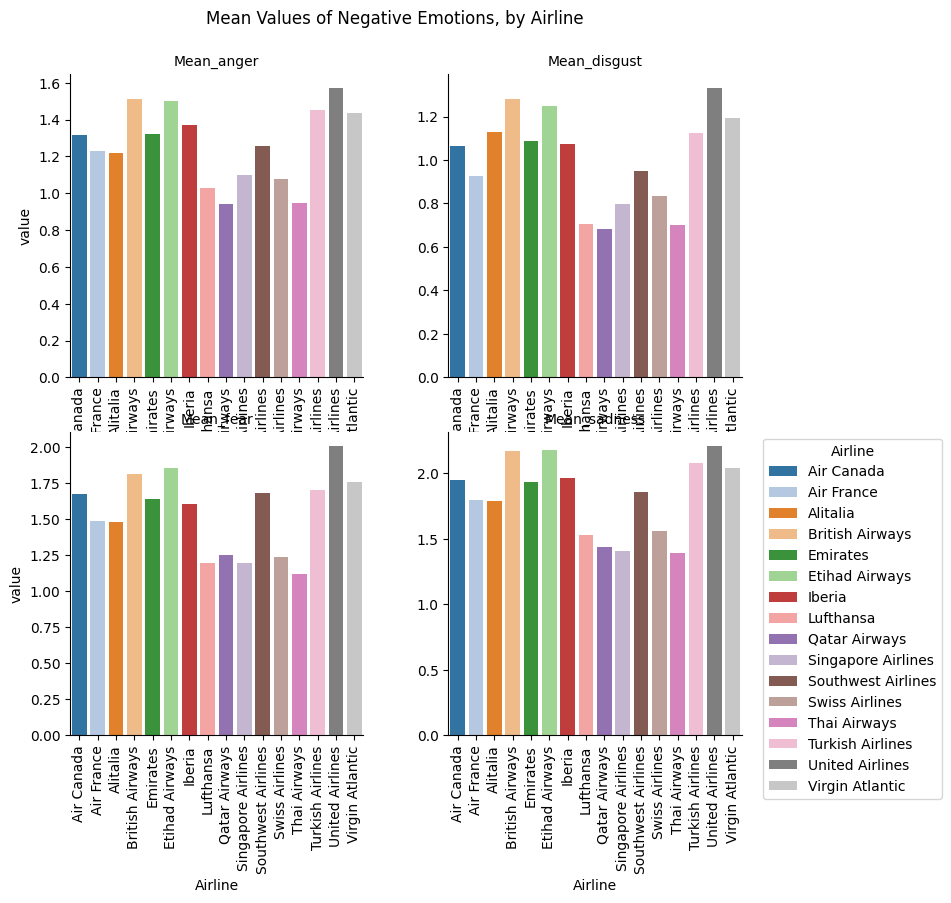

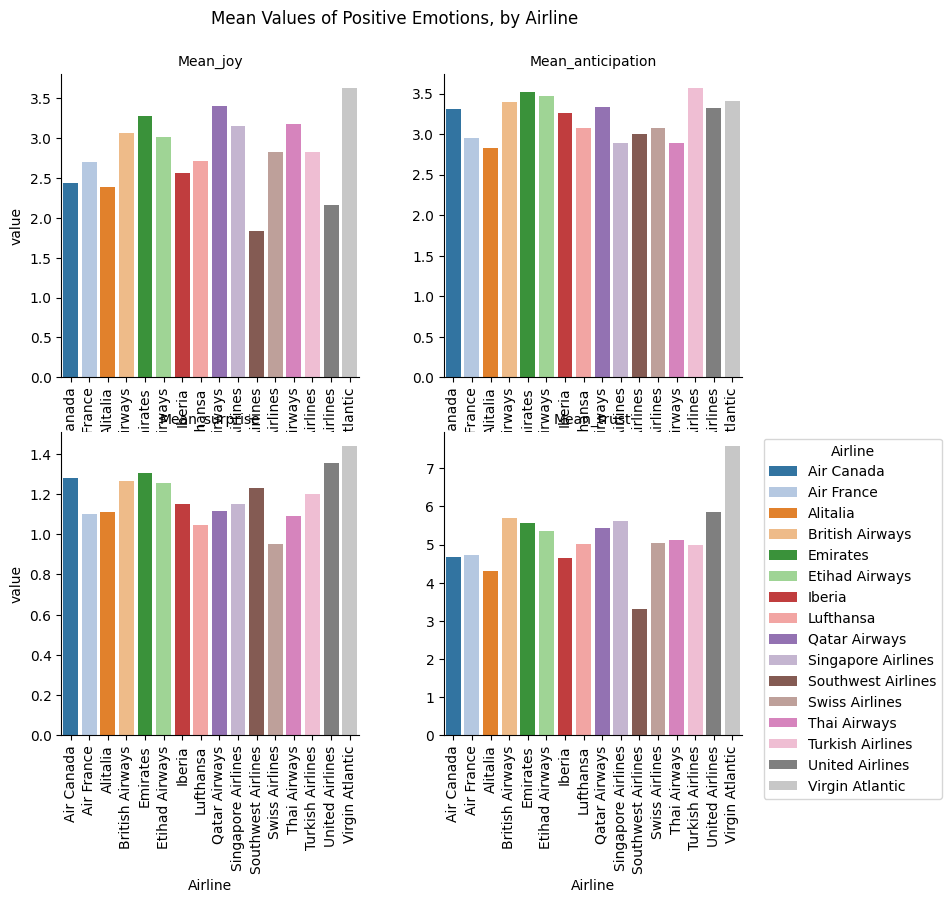

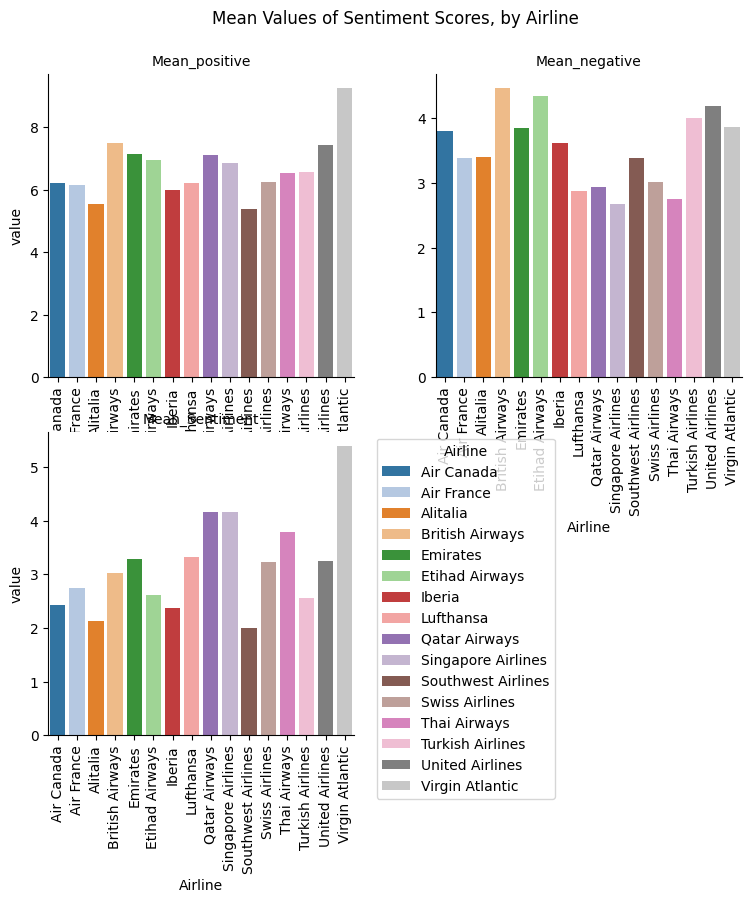

In [21]:
neg_emotions = ['Mean_anger', 'Mean_disgust', 'Mean_fear', 'Mean_sadness']
pos_emotions = ['Mean_joy', 'Mean_anticipation', 'Mean_surprise', 'Mean_trust']
sentiment_scores = ['Mean_positive', 'Mean_negative', 'Mean_Sentiment']

AirlineReviews_NegMeansWide = means_df.reset_index()[['Airline'] + neg_emotions].melt(id_vars='Airline', var_name='variable', value_name='value')
AirlineReviews_PosMeansWide = means_df.reset_index()[['Airline'] + pos_emotions].melt(id_vars='Airline', var_name='variable', value_name='value')
AirlineReviews_SentimentMeansWide = means_df.reset_index()[['Airline'] + sentiment_scores].melt(id_vars='Airline', var_name='variable', value_name='value')

def plot_emotions(df, title, palette):
    g = sns.FacetGrid(df, col="variable", col_wrap=2, sharex=False, sharey=False, height=4)
    g.map_dataframe(sns.barplot, x='Airline', y='value', hue='Airline', palette=palette, dodge=False)
    g.set_xticklabels(rotation=90)
    g.set_titles(col_template="{col_name}")
    g.fig.suptitle(title)
    plt.subplots_adjust(top=0.9)  # adjust the Figure in plt
    #g.add_legend()

    # Remove the legend if you don't want one legend per subplot
    for ax in g.axes.flat:
        ax.legend().set_visible(False)
    plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc=2)

# Define the color palette
palette = sns.color_palette("tab20", n_colors=len(AirlineReviews_NegMeansWide['Airline'].unique()))

# Plot for Negative Emotions
plot_emotions(AirlineReviews_NegMeansWide, 'Mean Values of Negative Emotions, by Airline', palette)

# Plot for Positive Emotions
plot_emotions(AirlineReviews_PosMeansWide, 'Mean Values of Positive Emotions, by Airline', palette)

# Plot for General Sentiment Scores
plot_emotions(AirlineReviews_SentimentMeansWide, 'Mean Values of Sentiment Scores, by Airline', palette)

We can simply calculate the distance across all airlines based on the mean emotions.We can subsequently use a method called multidimensional scaling (MDS) to plot the airlines in a 2-dimensional space, based on the Euclidean distances we just calculated.

In [22]:
means_df=means_df.reset_index()

In [23]:
means_df

sentiment,Airline,Mean_anger,Mean_anticipation,Mean_disgust,Mean_fear,Mean_joy,Mean_negative,Mean_positive,Mean_sadness,Mean_surprise,Mean_trust,Mean_Sentiment
0,Air Canada,1.317775,3.310102,1.063299,1.675831,2.436701,3.796036,6.223785,1.946292,1.278772,4.670077,2.427749
1,Air France,1.226629,2.953730,0.925401,1.485364,2.696884,3.385269,6.141643,1.796978,1.101039,4.721435,2.756374
2,Alitalia,1.216495,2.827688,1.126657,1.481591,2.385862,3.394698,5.536082,1.786451,1.111929,4.301915,2.141384
3,British Airways,1.512389,3.398666,1.279860,1.812579,3.068297,4.465375,7.494917,2.164867,1.266201,5.705527,3.029543
4,Emirates,1.320039,3.514032,1.089611,1.639586,3.273757,3.847366,7.137863,1.932546,1.303299,5.564746,3.290497
5,Etihad Airways,1.498031,3.473753,1.247375,1.858924,3.007218,4.337270,6.961942,2.175853,1.255906,5.345801,2.624672
6,Iberia,1.369146,3.263085,1.071625,1.608815,2.563361,3.615702,5.994490,1.960055,1.150138,4.637741,2.378788
7,Lufthansa,1.027171,3.069699,0.706438,1.195511,2.714708,2.877141,6.203780,1.524513,1.044891,5.022445,3.326639
8,Qatar Airways,0.942187,3.330280,0.681740,1.254722,3.398970,2.937607,7.097882,1.433887,1.116199,5.434459,4.160275
9,Singapore Airlines,1.100235,2.886453,0.797964,1.194988,3.155051,2.671887,6.844949,1.407204,1.151919,5.617071,4.173062


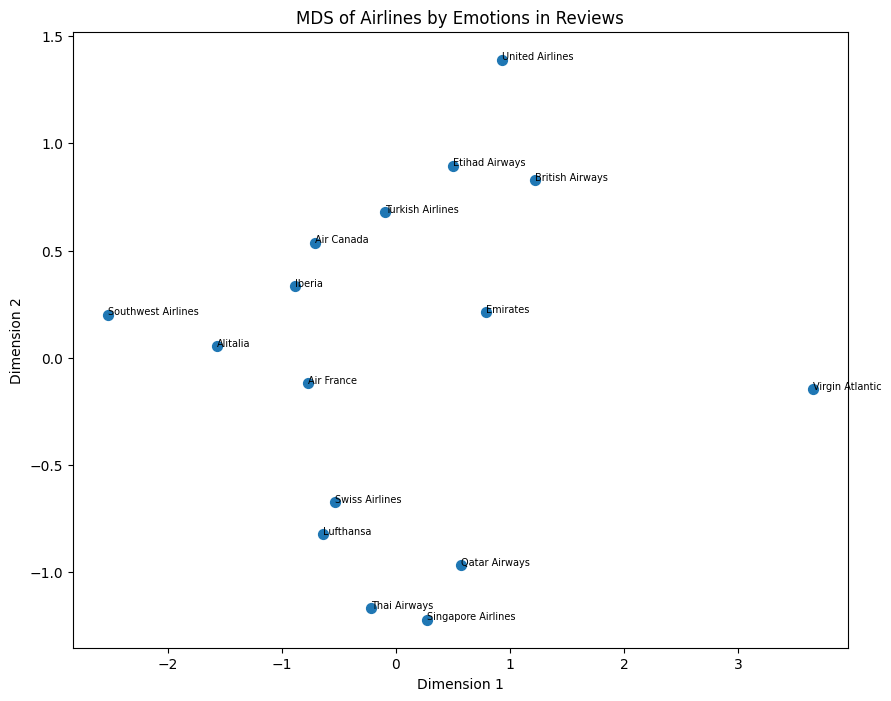

In [24]:
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

# Select the columns for mean emotions (assumed to be the first 10 columns)
Airlines_MeanEmotions = means_df.iloc[:, 1:11]

# Compute the distance matrix
EmotionDistance_Airlines = pd.DataFrame(
    squareform(pdist(Airlines_MeanEmotions)),
    index=means_df['Airline'],
    columns=means_df['Airline']
)

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
MDS_Emotions_points = mds.fit_transform(EmotionDistance_Airlines)

# Plot the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(MDS_Emotions_points[:, 0], MDS_Emotions_points[:, 1], s=50)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("MDS of Airlines by Emotions in Reviews")

# Add labels
for i, txt in enumerate(EmotionDistance_Airlines.index):
    plt.annotate(txt, (MDS_Emotions_points[i, 0], MDS_Emotions_points[i, 1]), fontsize=7)

plt.show()

### Topic Modelling

Topic Models such as Latent Dirichlet Allocation (LDA) or Structural Topic Models (STM) share the idea that documents are composed of various (latent) topics.
Topic Models allow us to discover these hidden topics and to then classify each document to a topic (or various).
Think about different books you like.
You will be easily able to assign them each to a specific genre by remembering the content.
Topic Models do the same.
They rely on the content of various documents to first infer a (pre-set) number of topics to then subsequently assign the documents to the identified topics (genres).
LDA models belong to the pioneering topic models and are today amongst the most widely applied models.
They take the assumption that each document is composed by various words.
Similarly, each topic shares a set of common words which are specific for the corresponding topic.
The ultimate goal of the LDA is thus to identify the various topics a document belongs to, based on the words a document shares with a specific topic.
LDAs belong to the group of unsupervised machine learning algorithms

We first use the dataframe that only contains negative reviews, this will allow us to first focus on which topics consumers commonly dislike when flying and to then later see, which airlines face which topics/complaints most

In [25]:
data

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,ReviewNumb
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1
1,5th January 2021,Air Canada,Toronto to Mumbai,2.0,"""please refund me my money""",I am messaging with an ardent request to refun...,NaN,Solo Leisure,Economy Class,no,2
2,5th January 2021,Air Canada,Vancouver to Toronto via Calgary,6.0,"""The main problem crops up with the IFE in the...","From a service perspective, Air Canada is gre...",A321,Solo Leisure,Economy Class,yes,3
3,20th December 2020,Air Canada,St Lucia to Ottawa via Toronto,1.0,"""this airline is absolutely shameful""","We returned from St-Lucia yesterday night, De...",NaN,Couple Leisure,Economy Class,no,4
4,4th December 2020,Air Canada,Ottawa to St John's,10.0,"""Air Canada came through""",My wife and I booked flights through Flight Ne...,NaN,Couple Leisure,Economy Class,yes,5
...,...,...,...,...,...,...,...,...,...,...,...
24386,21st July 2013,Virgin Atlantic,NaN,6.0,Virgin Atlantic customer review,VS200 LHR-SYD in Y+. I was advised at the gate...,NaN,NaN,Premium Economy,yes,24387
24387,17th July 2013,Virgin Atlantic,NaN,6.0,Virgin Atlantic customer review,Flight VS095 LHR-YVR July 4 2013. Seats 61-63 ...,NaN,NaN,Economy Class,yes,24388
24388,15th July 2013,Virgin Atlantic,NaN,7.0,Virgin Atlantic customer review,Flown with Virgin Atlantic for the last 13 yea...,NaN,NaN,Premium Economy,no,24389
24389,14th July 2013,Virgin Atlantic,NaN,2.0,Virgin Atlantic customer review,VS019 from Heathrow to SFO on 7/6/13 we had on...,NaN,NaN,Premium Economy,no,24390


In [27]:
## Topic Models for Negative Reviews

negative_reviews=data[data['overall_rating']<2]

In [29]:
from nltk.stem import SnowballStemmer 
from nltk.corpus import stopwords
from gensim import corpora, models
import re

In [30]:
def clean_text(text):
    # Convert to lower case
    text=text.lower()
    # Remove numbers
    text=re.sub(r'\d+','',text)
    # Stemming
    stemmer=SnowballStemmer("english")
    text=' '.join([stemmer.stem(word) for word in text.split()])
    # Remove stopwords
    stop_words=set(stopwords.words("english"))
    text=' '.join([word for word in text.split() if word not in stop_words])
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    text=text.strip()
    return text

In [32]:
negative_reviews['cleaned_review_text'] = negative_reviews['review_text'].apply(clean_text)

C:\Users\poong\AppData\Local\Temp\ipykernel_19132\3010567716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['cleaned_review_text'] = negative_reviews['review_text'].apply(clean_text)


In [33]:
negative_reviews

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,ReviewNumb,cleaned_review_text
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,1,veri bad servic custom support chang flight on...
3,20th December 2020,Air Canada,St Lucia to Ottawa via Toronto,1.0,"""this airline is absolutely shameful""","We returned from St-Lucia yesterday night, De...",NaN,Couple Leisure,Economy Class,no,4,return stlucia yesterday night decemb th year ...
5,25th November 2020,Air Canada,Seattle to Sydney via Vancouver,1.0,"""declined our request for a full refund""",Air Canada cancelled our flights just two days...,NaN,Family Leisure,Premium Economy,no,6,air canada cancel flight two day book cite cov...
6,13th November 2020,Air Canada,Shanghai to Fort Lauderdale via Montreal,1.0,"""by far the worst airline I’ve ever dealt with""",This is by far the worst airline I’ve ever de...,NaN,Solo Leisure,Economy Class,no,7,far worst airlin iv ever dealt asid spirit ser...
7,26th October 2020,Air Canada,Sacramento to Brisbane,1.0,"""Shame on you all""",A warning to those thinking of purchasing a t...,NaN,Solo Leisure,Premium Economy,no,8,warn think purchas ticket air canada practic r...
...,...,...,...,...,...,...,...,...,...,...,...,...
24335,1st October 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,YVR-LHR Sept 11/13 VS95. I decided to fly Virg...,NaN,NaN,Economy Class,no,24336,yvrlhr sept vs decid fli virgin experi advert...
24338,24th September 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,Manchester to Las Vegas Stag party nightmare 9...,NaN,NaN,Economy Class,no,24339,manchest las vega stag parti nightmar hour hel...
24344,16th September 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,Came from London to New York last night Sep 15...,NaN,NaN,Premium Economy,no,24345,came london new york last night sep husband a...
24370,6th August 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,I travel London to Boston every summer for wor...,NaN,NaN,Economy Class,no,24371,travel london boston everi summer work use tra...


## Creating Dictionary and Corpus for Topic Modeling

This section of the code is focused on preparing the data for topic modeling. We are using the `gensim` library to create a dictionary and a corpus from our cleaned text data. Here's a brief overview of each step:

1. **Preparing Text Data**:
    - `texts`: This is a list of lists. Each inner list contains tokens (words) from a single document (review) in the `negative_reviews` dataset. 
    - The `split()` function is used on each review to tokenize the text, splitting it into individual words.

2. **Creating a Dictionary**:
    - `dictionary = corpora.Dictionary(texts)`: 
        - This creates a `Dictionary` object from `texts`.
        - Each unique word in the dataset is assigned a unique integer ID.
        - The dictionary encapsulates the mapping between words and their integer IDs.

3. **Creating a Corpus**:
    - `corpus = [dictionary.doc2bow(text) for text in texts]`: 
        - Here, we convert each document into a bag-of-words (BoW) format using `doc2bow`.
        - In BoW, each document is represented as a list of tuples, where each tuple is a pair of a word’s integer ID and its frequency in the document.
        - This `corpus` object will be used for topic modeling.


In [37]:
# Create a dictionary and corpus for topic modeling
texts = [text.split() for text in negative_reviews['cleaned_review_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

We need to tell the algorithm how many latent topics we assume to be in the data.
This is not always easy, as we might have an idea, but given that we -- commonly -- are not able to really read all content, we often have a hard time finding an adequate number of topics.

## Optimal Number of Topics in LDA

This code calculates and plots coherence scores for LDA models with different numbers of topics to determine the optimal number. Key steps include:

1. **Training LDA Models**: Multiple models are trained with varying topic counts.
2. **Computing Coherence**: Each model's coherence score is calculated to assess topic quality.
3. **Plotting Results**: Coherence scores are plotted against the number of topics, helping to visually identify the optimal count.


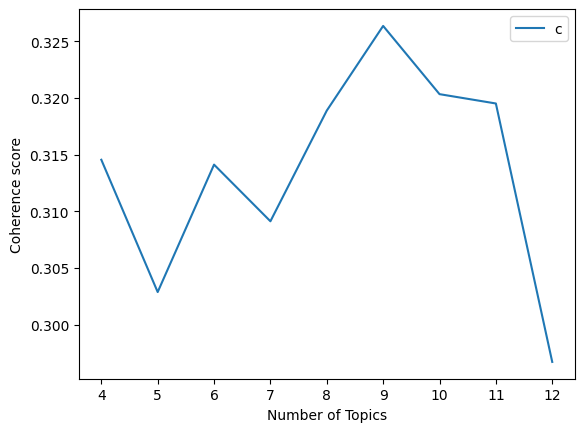

In [44]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Assuming 'dictionary' and 'corpus' are already created as shown in your previous code

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Set parameters
start=4; limit=13; step=1

# Call the function
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

# Plotting the coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


Going with 9 topics as it gave the highest coherence score

In [171]:
# Set parameters
num_topics = 9
chunksize = 2000  # equivalent to batch size; adjust as per your dataset size
passes = 20       # controls how many times the algorithm will pass through the entire corpus; similar to iter
iterations = 400  # number of iterations for each pass; similar to burn-in and iter combined
alpha = 50 / num_topics  # alpha parameter - per document topic distribution
eta = 0.1        # eta parameter - per topic word distribution

# Set random seed for reproducibility
np.random.seed(1500)

# Run LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                     random_state=1500, chunksize=chunksize, passes=passes,
                     alpha=alpha, eta=eta, iterations=iterations)

# Save the model
lda_model.save('negative_lda_model')


Once the model converged we can focus on the output and try to understand which topics the model identified.
To get there, we will first plot the top words per topic with the following code.

In [173]:
def extract_top_terms_per_topic(lda_model, num_terms=10):
    top_terms = []
    for topic_id, topic_words in lda_model.show_topics(num_topics=-1, num_words=num_terms, formatted=False):
        for term, score in topic_words:
            top_terms.append([topic_id, term, score])
    return pd.DataFrame(top_terms, columns=['topic', 'term', 'beta'])

# Assuming lda_model is your trained LDA model
top_terms_df = extract_top_terms_per_topic(lda_model, num_terms=10)


In [174]:
top_terms_df

,topic,term,beta
0,0,seat,0.032795
1,0,flight,0.017852
2,0,attend,0.013020
3,0,ask,0.012513
4,0,sit,0.011510
...,...,...,...
85,8,airlin,0.015294
86,8,turkish,0.011544
87,8,istanbul,0.010817
88,8,time,0.010105


c:\Users\poong\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


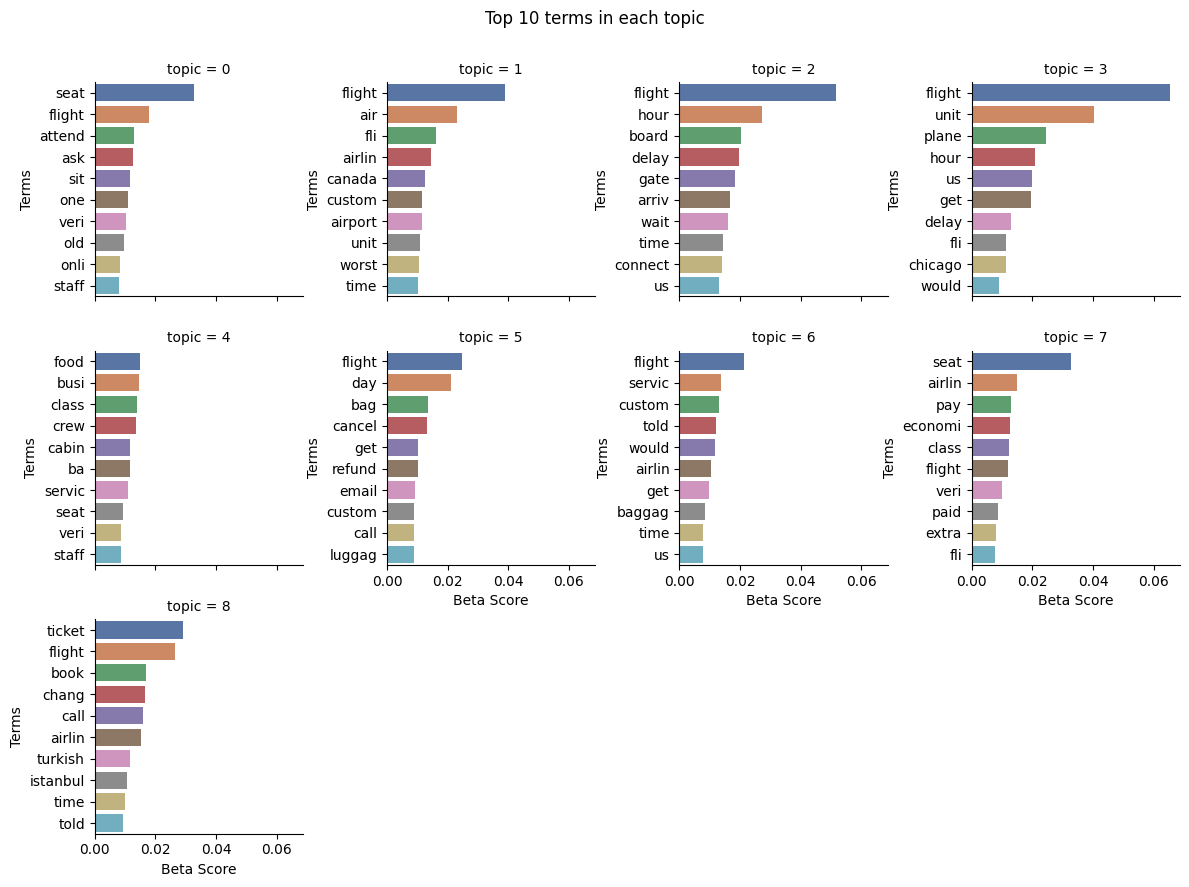

In [175]:
def plot_top_terms(df, num_topics, num_terms=10):
    g = sns.FacetGrid(df, col="topic", col_wrap=4, sharey=False)
    g.map(sns.barplot, "beta", "term", palette="deep")
    
    for ax in g.axes:
        ax.set_ylabel('Terms')
        ax.set_xlabel('Beta Score')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle("Top 10 terms in each topic")

plot_top_terms(top_terms_df, num_topics=lda_model.num_topics)


## Interpreted Topics from LDA Analysis

After analyzing the top terms in each topic generated by the LDA model, we can assign the following interpretative names to each topic:

- **Topic 0 - Seating and Service**: Discussions about seating arrangements and the service provided by flight attendants.
- **Topic 1 - Customer Support**: Interactions with customer support services at airlines, particularly addressing service at the airport.
- **Topic 2 - Flight Delays**: Experiences and issues related to flight delays, including waiting times and connecting flights.
- **Topic 3 - US Domestic Travel**: Specifics of traveling within the United States, including discussions about delays and city-related issues.
- **Topic 4 - Onboard Amenities**: Quality and variety of food, as well as the overall service quality, especially in different seating classes such as business class.
- **Topic 5 - Baggage and Refunds**: Concerns regarding baggage handling and financial aspects like refunds and flight cancellations.
- **Topic 6 - Policy and Communication**: Customer experiences related to airline policies, how they're communicated, and their impact on the travel experience.
- **Topic 7 - Economy Class and Upgrades**: Conversations about economy class seating and the process or option of upgrading seats, including the financial implications.
- **Topic 8 - Reservations and Airlines**: Issues related to the ticket booking process, flight changes, and mentions of specific airlines or destinations.

These topic names are derived from the aggregation of terms with the highest beta scores in each topic, providing a snapshot of the main themes discussed in negative reviews.


### Airline Insights

To assess which topics are associated with a specific airline, we first need to assign to each review the different topic probabilities, which we can do with the following code.

In [65]:
negative_reviews_reset=negative_reviews.reset_index(drop=True)

In [66]:
# Get the topic distribution for each document
topic_distributions = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]

# Convert the topic distributions to a list of dictionaries
topic_dicts = []
for dist in topic_distributions:
    topic_dict = {i: 0 for i in range(lda_model.num_topics)}  # Initialize a dictionary with zero for each topic
    for topic_num, prob in dist:
        topic_dict[topic_num] = prob  # Update the probability for the topic
    topic_dicts.append(topic_dict)

# Create a DataFrame from the list of dictionaries
topic_df = pd.DataFrame(topic_dicts)

# Merge the topic distribution DataFrame with the original reviews DataFrame
# Ensure that the indices in negative_reviews correspond to the document indices in the corpus
negative_reviews_corrected = negative_reviews_reset.join(topic_df)

# Rename the columns to reflect the topic numbers
column_mapping = {i: f'Topic{i+1}' for i in range(lda_model.num_topics)}
negative_reviews_corrected.rename(columns=column_mapping, inplace=True)

# Now, `negative_reviews_corrected` contains the original reviews along with their topic distributions


In [67]:
negative_reviews_corrected

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,...,cleaned_review_text,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
0,7th January 2021,Air Canada,Washington to Beirut,1.0,"""Very bad service and customer support""",Very bad service and customer support. They ch...,NaN,Solo Leisure,Economy Class,no,...,veri bad servic custom support chang flight on...,0.098125,0.150566,0.086713,0.085936,0.075663,0.100464,0.122904,0.094853,0.184777
1,20th December 2020,Air Canada,St Lucia to Ottawa via Toronto,1.0,"""this airline is absolutely shameful""","We returned from St-Lucia yesterday night, De...",NaN,Couple Leisure,Economy Class,no,...,return stlucia yesterday night decemb th year ...,0.058738,0.268844,0.059371,0.117892,0.111192,0.073858,0.097059,0.072246,0.140801
2,25th November 2020,Air Canada,Seattle to Sydney via Vancouver,1.0,"""declined our request for a full refund""",Air Canada cancelled our flights just two days...,NaN,Family Leisure,Premium Economy,no,...,air canada cancel flight two day book cite cov...,0.068452,0.116621,0.072891,0.099695,0.134667,0.183004,0.078111,0.083717,0.162843
3,13th November 2020,Air Canada,Shanghai to Fort Lauderdale via Montreal,1.0,"""by far the worst airline I’ve ever dealt with""",This is by far the worst airline I’ve ever de...,NaN,Solo Leisure,Economy Class,no,...,far worst airlin iv ever dealt asid spirit ser...,0.091617,0.162471,0.080614,0.110850,0.110108,0.134941,0.111299,0.094310,0.103790
4,26th October 2020,Air Canada,Sacramento to Brisbane,1.0,"""Shame on you all""",A warning to those thinking of purchasing a t...,NaN,Solo Leisure,Premium Economy,no,...,warn think purchas ticket air canada practic r...,0.070444,0.164084,0.064299,0.106996,0.085196,0.151420,0.090880,0.103538,0.163143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,1st October 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,YVR-LHR Sept 11/13 VS95. I decided to fly Virg...,NaN,NaN,Economy Class,no,...,yvrlhr sept vs decid fli virgin experi advert...,0.143236,0.074209,0.082698,0.062758,0.329014,0.075883,0.066585,0.112428,0.053190
5973,24th September 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,Manchester to Las Vegas Stag party nightmare 9...,NaN,NaN,Economy Class,no,...,manchest las vega stag parti nightmar hour hel...,0.230523,0.077903,0.120661,0.113385,0.114759,0.077975,0.093301,0.096677,0.074816
5974,16th September 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,Came from London to New York last night Sep 15...,NaN,NaN,Premium Economy,no,...,came london new york last night sep husband a...,0.174750,0.087719,0.144382,0.092076,0.092474,0.116142,0.106335,0.105821,0.080301
5975,6th August 2013,Virgin Atlantic,NaN,1.0,Virgin Atlantic customer review,I travel London to Boston every summer for wor...,NaN,NaN,Economy Class,no,...,travel london boston everi summer work use tra...,0.088548,0.126209,0.100055,0.094218,0.103894,0.119740,0.158219,0.129147,0.079969


We extract the topic probabilities (gammas) from the estimated LDA model and add them to the dataframe with the reviews.
Finally, we rename the columns.
We can now count the occurrence of each topic in each review.
To do so we have to think about, when we want to label a review, i.e. when we believe the topic probability to be high enough to say that a review contains a specific topic.
The advantage of this approach is that we allow reviews to contain more than one topic, compared to other common approaches, where one labels a review only with the topic with the highest probability

In [108]:
# Filter the DataFrame to include reviews where at least one topic proportion is >= 0.25
cutoff_df_negative = negative_reviews_corrected[
    (negative_reviews_corrected['Topic1'] >= 0.25) | 
    (negative_reviews_corrected['Topic2'] >= 0.25) |
    (negative_reviews_corrected['Topic3'] >= 0.25) |
    (negative_reviews_corrected['Topic4'] >= 0.25) |
    (negative_reviews_corrected['Topic5'] >= 0.25) |
    (negative_reviews_corrected['Topic6'] >= 0.25) |
    (negative_reviews_corrected['Topic7'] >= 0.25) |
    (negative_reviews_corrected['Topic8'] >= 0.25) |
    (negative_reviews_corrected['Topic9'] >= 0.25)
].copy()  # Use copy to avoid SettingWithCopyWarning

# Create binary counts for each topic
for i in range(1, 10):
    topic_col = f'Topic{i}'
    count_col = f'{topic_col}Count'
    cutoff_df_negative[count_col] = (cutoff_df_negative[topic_col] >= 0.25).astype(int)

# Assuming that 'Airline' is a column in your DataFrame that identifies the airline for each review
# Group by 'Airline' and count the number of significant topic proportions for each topic
topic_count_negative = cutoff_df_negative.groupby('Airline').agg(
    **{f'Topic{i}': (f'Topic{i}Count', 'sum') for i in range(1, 10)}
).reset_index()

# The DataFrame 'topic_count_negative' now contains the counts of significant topic occurrences by airline


In [110]:
topic_count_negative

,Airline,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
0,Air Canada,7,26,13,12,9,15,1,3,3
1,Air France,5,10,14,0,12,3,1,4,5
2,Alitalia,8,0,8,0,6,5,2,4,16
3,British Airways,17,0,19,0,157,14,5,20,13
4,Emirates,18,1,21,1,43,5,1,9,9
5,Etihad Airways,14,0,15,0,68,11,2,3,22
6,Iberia,4,0,8,0,5,16,1,0,4
7,Lufthansa,3,1,18,1,8,4,1,6,15
8,Qatar Airways,0,0,10,0,7,4,0,0,4
9,Singapore Airlines,7,0,2,0,5,1,1,11,1


While the absolute numbers are already interesting, it may also make sense to look at the relative shares per airlines, which we obtain by dividing each value, by the sum of reviews per airline.
We can finally achieve this with the following code.


In [112]:
# Calculate the sum of the topic counts for each row
topic_count_negative['sum'] = topic_count_negative.iloc[:, 1:].sum(axis=1)

# Create a new DataFrame with the weighted (proportional) topic counts
weighted_topics_negative = pd.DataFrame({
    'Airline': topic_count_negative['Airline'],
    **{
        f'Topic{i}': round(topic_count_negative[f'Topic{i}'] / topic_count_negative['sum'], 2)
        for i in range(1, 9)
    }
})

# Create a new DataFrame with named topics instead of 'Topic1', 'Topic2', etc.
weighted_topics_name_negative = pd.DataFrame({
    'Airline': topic_count_negative['Airline'],
    'Seating': round(topic_count_negative['Topic1'] / topic_count_negative['sum'], 2),
    'CustomerSupport': round(topic_count_negative['Topic2'] / topic_count_negative['sum'], 2),
    'FlightDelays': round(topic_count_negative['Topic3'] / topic_count_negative['sum'], 2),
    'USDomesticTravel': round(topic_count_negative['Topic4'] / topic_count_negative['sum'], 2),
    'OnboardAmenities': round(topic_count_negative['Topic5'] / topic_count_negative['sum'], 2),
    'BaggageRefunds': round(topic_count_negative['Topic6'] / topic_count_negative['sum'], 2),
    'PolicyCommunication': round(topic_count_negative['Topic7'] / topic_count_negative['sum'], 2),
    'EconomyClassUpgrades': round(topic_count_negative['Topic8'] / topic_count_negative['sum'], 2),
    'Reservation&Airlines': round(topic_count_negative['Topic9'] / topic_count_negative['sum'], 2)
})

# Set the airline names as the index of the DataFrame and drop the Airline column
weighted_topics_name_negative.set_index('Airline', inplace=True)

# Transpose the DataFrame for a different view
weighted_topics_name_df_negative = weighted_topics_name_negative.T


In [113]:
weighted_topics_name_df_negative

Airline,Air Canada,Air France,Alitalia,British Airways,Emirates,Etihad Airways,Iberia,Lufthansa,Qatar Airways,Singapore Airlines,Southwest Airlines,Swiss Airlines,Thai Airways,Turkish Airlines,United Airlines,Virgin Atlantic
Seating,0.04,0.05,0.08,0.03,0.08,0.05,0.05,0.03,0.00,0.12,0.11,0.11,0.08,0.03,0.05,0.06
CustomerSupport,0.15,0.09,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.00
FlightDelays,0.07,0.13,0.08,0.04,0.10,0.06,0.11,0.16,0.20,0.04,0.05,0.03,0.08,0.12,0.08,0.00
USDomesticTravel,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.14,0.00,0.00,0.00,0.24,0.00
OnboardAmenities,0.05,0.11,0.06,0.32,0.20,0.25,0.07,0.07,0.14,0.09,0.00,0.08,0.19,0.04,0.02,0.34
BaggageRefunds,0.08,0.03,0.05,0.03,0.02,0.04,0.21,0.04,0.08,0.02,0.15,0.08,0.03,0.06,0.02,0.00
PolicyCommunication,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.00,0.02,0.00,0.05,0.08,0.00,0.01,0.00
EconomyClassUpgrades,0.02,0.04,0.04,0.04,0.04,0.01,0.00,0.05,0.00,0.20,0.02,0.08,0.00,0.01,0.04,0.10
Reservation&Airlines,0.02,0.05,0.16,0.03,0.04,0.08,0.05,0.13,0.08,0.02,0.04,0.03,0.03,0.23,0.02,0.00


### Visualization

In [198]:
import pandas as pd
import numpy as np

# Assuming weighted_topics_name_df_negative is the DataFrame from previous steps
final_circ_df_negative = weighted_topics_name_df_negative.to_numpy()

# Prepare data for the chord diagram
rows, cols = np.where(final_circ_df_negative > 0)
edges = zip(weighted_topics_name_df_negative.index[rows], weighted_topics_name_df_negative.columns[cols])
weights = final_circ_df_negative[rows, cols]
testcirc_negative = pd.DataFrame({'from': weighted_topics_name_df_negative.index[rows], 
                                  'to': weighted_topics_name_df_negative.columns[cols], 
                                  'value': weights})

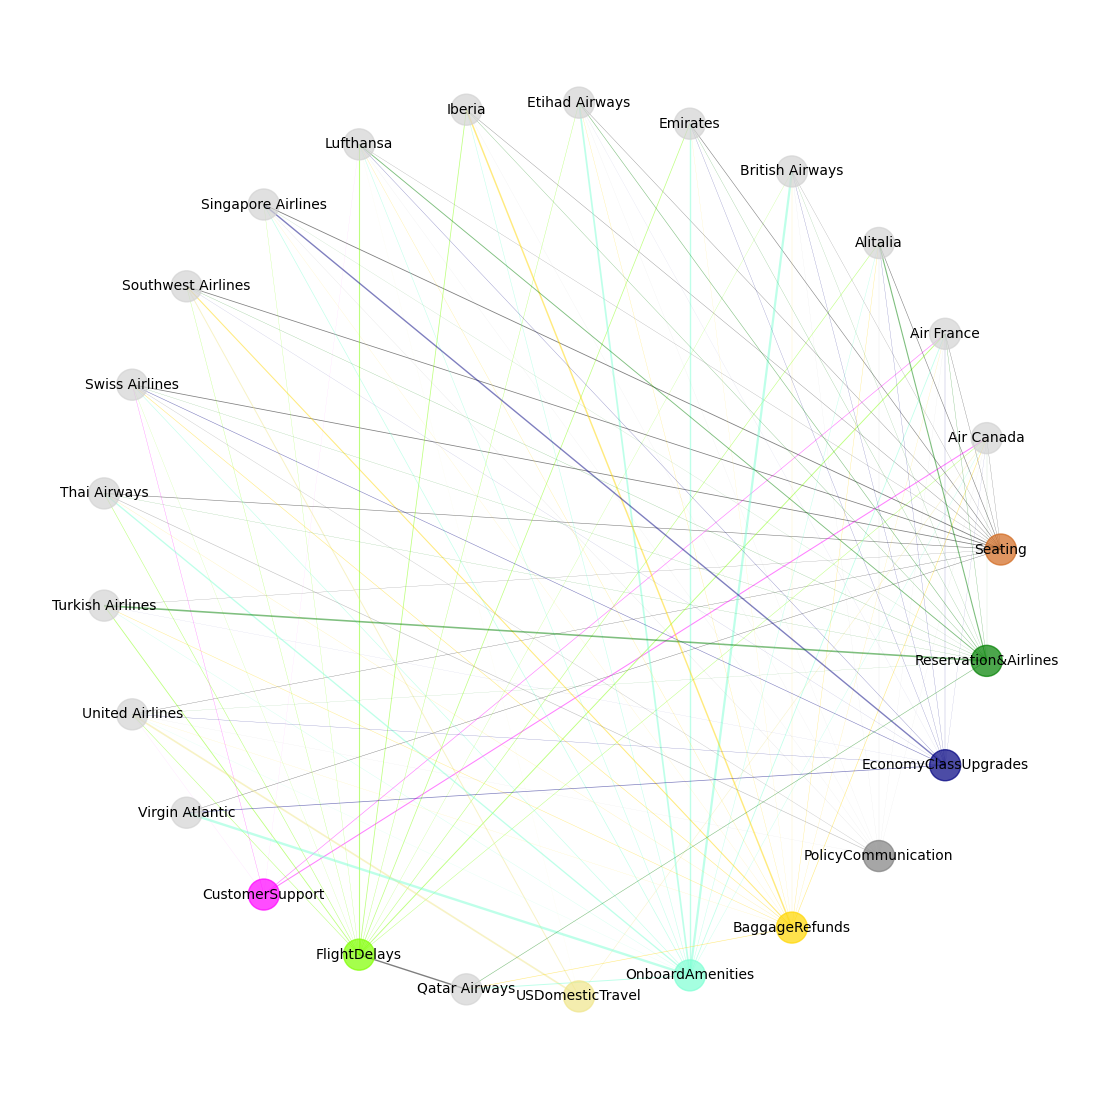

In [199]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(testcirc_negative, 'from', 'to', edge_attr=True)

# Define the topic colors
topic_colors = {
    'Seating': 'chocolate',
    'CustomerSupport': 'magenta',
    'FlightDelays': 'chartreuse',
    'USDomesticTravel': 'khaki',
    'OnboardAmenities': 'aquamarine',
    'BaggageRefunds': 'gold',
    'PolicyCommunication': 'gray',
    'EconomyClassUpgrades': 'navy',
    'Reservation&Airlines': 'green'
}

# Define positions for the circular layout
pos = nx.circular_layout(G)

# Draw the nodes
node_color_list = [topic_colors.get(node, 'lightgray') for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_color_list, alpha=0.7)

# Draw the edges
for edge in G.edges(data=True):
    source, target, data = edge
    edge_color = topic_colors.get(target, 'black')  # Get the color for the target node
    nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=data['value']*5, alpha=0.5, edge_color=edge_color)

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Remove the axis
plt.axis('off')

# Set the plot size (optional)
plt.gcf().set_size_inches(14, 14)

# Show the plot
plt.show()


### Positive reviews

In [131]:
positive_reviews=data[data['overall_rating']>8]

In [132]:
positive_reviews['cleaned_review_text'] = positive_reviews['review_text'].apply(clean_text)

C:\Users\poong\AppData\Local\Temp\ipykernel_19132\2609106715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['cleaned_review_text'] = positive_reviews['review_text'].apply(clean_text)


In [133]:
positive_reviews

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,cleaned_review_text
4,4th December 2020,Air Canada,Ottawa to St John's,10.0,"""Air Canada came through""",|My wife and I booked flights through Flight N...,NaN,Couple Leisure,Economy Class,yes,mi wife book flight flight network chose air c...
11,5th October 2020,Air Canada,Montreal to Vancouver,9.0,"""staff went beyond and above""",|Montreal to Vancouver with Air Canada. I was ...,NaN,Solo Leisure,Economy Class,yes,montreal vancouv air canada veri pleas amount ...
14,5th September 2020,Air Canada,London to Vancouver,9.0,"""professional, helpful, attentive and friendly""",| First long haul flight since Covid impacted ...,Boeing 789,Solo Leisure,Economy Class,yes,first long haul flight sinc covid impact trave...
20,10th July 2020,Air Canada,Toronto to Vancouver,10.0,"""compassion and professionalism""",| I had flown back to Toronto for a family eme...,NaN,Solo Leisure,Economy Class,yes,flown back toronto famili emerg book return fl...
34,26th April 2020,Air Canada,London Heathrow to Toronto,10.0,"""staff were great and very pleasant""","|Departed Toronto to London on December 12, 20...",Boeing 787,Family Leisure,Economy Class,yes,depart toronto london decemb morn flight retu...
...,...,...,...,...,...,...,...,...,...,...,...
24363,18th August 2013,Virgin Atlantic,NaN,10.0,Virgin Atlantic customer review,EDI-LHR. From start to finish the entire Virgi...,NaN,NaN,Economy Class,yes,edilhr start finish entir virgin littl red exp...
24366,15th August 2013,Virgin Atlantic,NaN,9.0,Virgin Atlantic customer review,Flew from Shanghai to London Heathrow on a con...,NaN,NaN,Economy Class,yes,flew shanghai london heathrow connect flight n...
24374,4th August 2013,Virgin Atlantic,NaN,9.0,Virgin Atlantic customer review,Flew Premium Economy on VS39 VS40 and I've got...,NaN,NaN,Premium Economy,yes,flew premium economi vs vs iv got say pleasant...
24376,31st July 2013,Virgin Atlantic,NaN,9.0,Virgin Atlantic customer review,LGW-ANU and return. Excellent flight experienc...,NaN,NaN,Business Class,yes,lgwanu return excel flight experience seat com...


In [137]:
# Create a dictionary and corpus for topic modeling
texts_positive = [text.split() for text in positive_reviews['cleaned_review_text']]
dictionary_pos = corpora.Dictionary(texts_positive)
corpus_pos = [dictionary_pos.doc2bow(text) for text in texts_positive]

In [139]:
len(corpus_pos)

6050

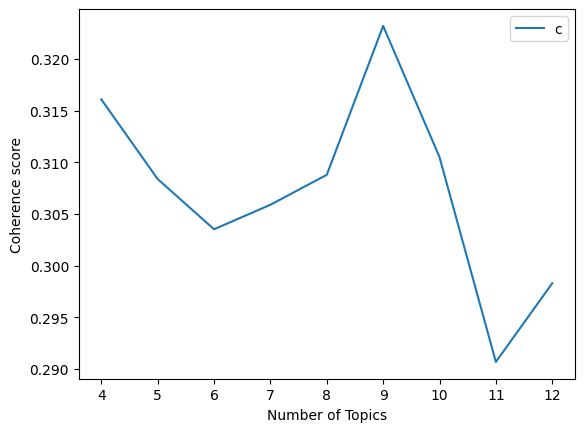

In [142]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Set parameters
start=4; limit=13; step=1

# Call the function
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_pos, corpus=corpus_pos, texts=texts_positive, start=start, limit=limit, step=step)

# Plotting the coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [148]:
num_topics = 9
chunksize = 2000  # equivalent to batch size; adjust as per your dataset size
passes = 20       # controls how many times the algorithm will pass through the entire corpus; similar to iter
iterations = 400  # number of iterations for each pass; similar to burn-in and iter combined
alpha = 50 / num_topics  # alpha parameter - per document topic distribution
eta = 0.1        # eta parameter - per topic word distribution

# Set random seed for reproducibility
np.random.seed(1500)

# Run LDA
lda_model_pos = LdaModel(corpus=corpus_pos, id2word=dictionary_pos, num_topics=num_topics,
                     random_state=1500, chunksize=chunksize, passes=passes,
                     alpha=alpha, eta=eta, iterations=iterations)

# Save the model
lda_model_pos.save('positive_lda_model')


In [166]:
# Assuming lda_model is your trained LDA model
top_terms_df_pos = extract_top_terms_per_topic(lda_model_pos, num_terms=10)

In [167]:
top_terms_df_pos

,topic,term,beta
0,0,flight,0.035932
1,0,virgin,0.031578
2,0,long,0.016447
3,0,staff,0.015557
4,0,new,0.015173
...,...,...,...
85,8,busi,0.015349
86,8,first,0.013998
87,8,class,0.013775
88,8,airway,0.012227


c:\Users\poong\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


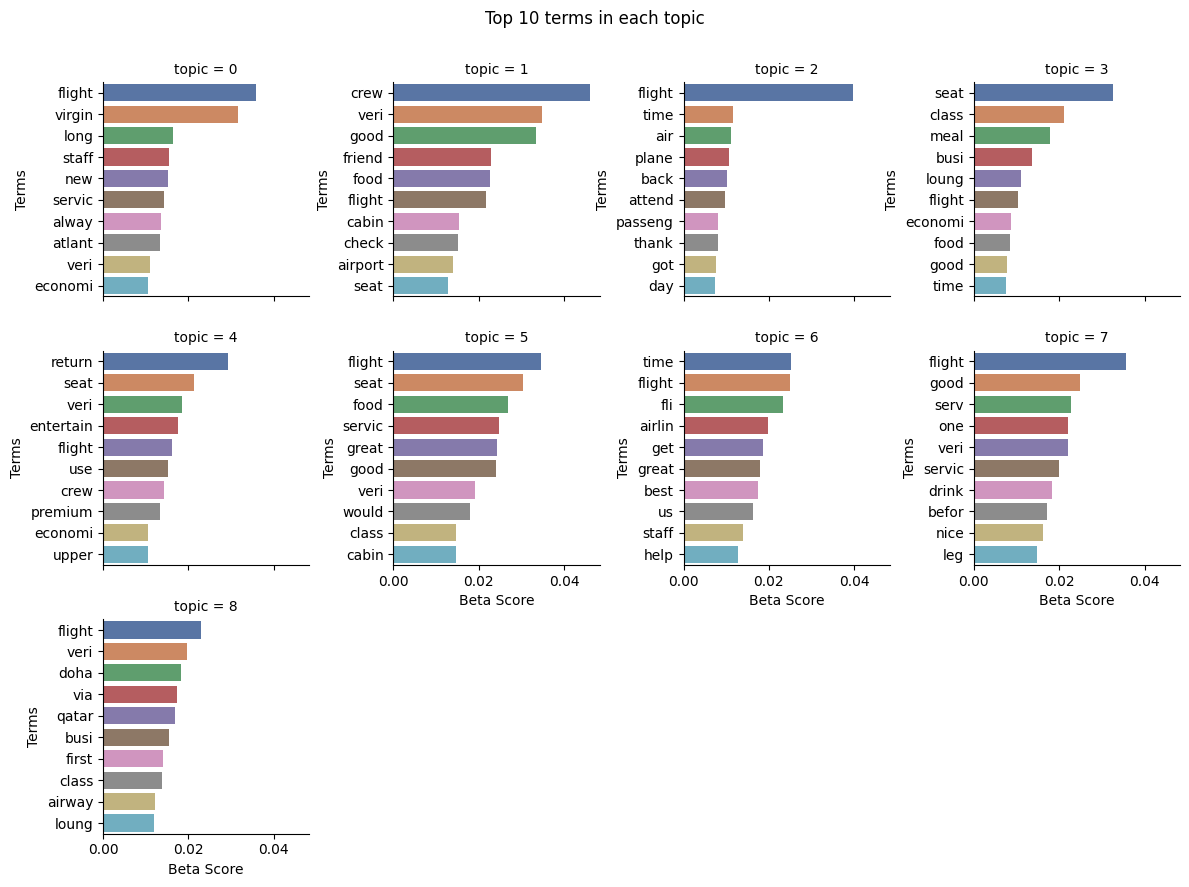

In [168]:
def plot_top_terms(df, num_topics, num_terms=10):
    g = sns.FacetGrid(df, col="topic", col_wrap=4, sharey=False)
    g.map(sns.barplot, "beta", "term", palette="deep")
    
    for ax in g.axes:
        ax.set_ylabel('Terms')
        ax.set_xlabel('Beta Score')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle("Top 10 terms in each topic")

plot_top_terms(top_terms_df_pos, num_topics=lda_model.num_topics)


## Interpreted Topics from LDA Analysis

In our LDA model, we have identified several topics characterized by their top contributing words. Below is an interpretation of each topic based on the most significant terms:

- **Topic 0 - Seating**: Discussions likely focusing on the comfort, space, and overall quality of seating on flights.
- **Topic 1 - Cabin Experience**: Conversations around the in-flight experience, including interactions with the crew and in-flight amenities.
- **Topic 2 - Plane**: Talks related to the aircraft and the timeliness of flights, possibly discussing the plane's features or the punctuality of the airline.
- **Topic 3 - Luxury**: Discussions on luxurious travel experiences, such as access to business class benefits and lounge facilities.
- **Topic 4 - Loyalty**: Conversations pertaining to airline loyalty programs and the benefits of being a returning customer, such as premium seating and entertainment options.
- **Topic 5 - Food**: Discussions about food quality and service, a central aspect of the in-flight experience.
- **Topic 6 - US Traveling**: Talks related to traveling within or to and from the United States, discussing aspects of service related to U.S. flights.
- **Topic 7 - Gate Experience**: Conversations around the experience at the airport gate before boarding, including boarding efficiency, gate facilities, and waiting times.
- **Topic 8 - Middle East**: Discussions related to experiences with airlines based in the Middle East or travel within that region.

These interpretations are based on the aggregation of terms with the highest contribution to each topic, reflecting the key themes in the positive reviews.


In [178]:
positive_reviews_reset=positive_reviews.reset_index(drop=True)

In [188]:
# Get the topic distribution for each document
topic_distributions_pos = [lda_model_pos.get_document_topics(bow, minimum_probability=0) for bow in corpus_pos]

# Convert the topic distributions to a list of dictionaries
topic_dicts_pos = []
for dist in topic_distributions_pos:
    topic_dict_pos = {i: 0 for i in range(lda_model.num_topics)}  # Initialize a dictionary with zero for each topic
    for topic_num, prob in dist:
        topic_dict_pos[topic_num] = prob  # Update the probability for the topic
    topic_dicts_pos.append(topic_dict_pos)

# Create a DataFrame from the list of dictionaries
topic_df_pos = pd.DataFrame(topic_dicts_pos)

# Merge the topic distribution DataFrame with the original reviews DataFrame
# Ensure that the indices in negative_reviews correspond to the document indices in the corpus
positive_reviews_corrected = positive_reviews_reset.join(topic_df_pos)

# Rename the columns to reflect the topic numbers
column_mapping = {i: f'Topic{i+1}' for i in range(lda_model_pos.num_topics)}
positive_reviews_corrected.rename(columns=column_mapping, inplace=True)

# Now, `positive_reviews_corrected` contains the original reviews along with their topic distributions


In [189]:
positive_reviews_corrected

,review_written,Airline,route,overall_rating,title,review_text,aircraft,type_of_traveller,seat_type,recommendation,cleaned_review_text,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
0,4th December 2020,Air Canada,Ottawa to St John's,10.0,"""Air Canada came through""",|My wife and I booked flights through Flight N...,NaN,Couple Leisure,Economy Class,yes,mi wife book flight flight network chose air c...,0.054964,0.077460,0.449970,0.044678,0.055240,0.049327,0.156119,0.058934,0.053307
1,5th October 2020,Air Canada,Montreal to Vancouver,9.0,"""staff went beyond and above""",|Montreal to Vancouver with Air Canada. I was ...,NaN,Solo Leisure,Economy Class,yes,montreal vancouv air canada veri pleas amount ...,0.092498,0.113615,0.166052,0.085077,0.099423,0.090190,0.168250,0.100054,0.084841
2,5th September 2020,Air Canada,London to Vancouver,9.0,"""professional, helpful, attentive and friendly""",| First long haul flight since Covid impacted ...,Boeing 789,Solo Leisure,Economy Class,yes,first long haul flight sinc covid impact trave...,0.113693,0.121785,0.170814,0.090890,0.093869,0.119963,0.084977,0.081802,0.122206
3,10th July 2020,Air Canada,Toronto to Vancouver,10.0,"""compassion and professionalism""",| I had flown back to Toronto for a family eme...,NaN,Solo Leisure,Economy Class,yes,flown back toronto famili emerg book return fl...,0.086781,0.074507,0.305660,0.075338,0.115991,0.075134,0.103893,0.086676,0.076020
4,26th April 2020,Air Canada,London Heathrow to Toronto,10.0,"""staff were great and very pleasant""","|Departed Toronto to London on December 12, 20...",Boeing 787,Family Leisure,Economy Class,yes,depart toronto london decemb morn flight retu...,0.119171,0.087393,0.201878,0.078638,0.106290,0.114317,0.133470,0.081925,0.076918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,18th August 2013,Virgin Atlantic,NaN,10.0,Virgin Atlantic customer review,EDI-LHR. From start to finish the entire Virgi...,NaN,NaN,Economy Class,yes,edilhr start finish entir virgin littl red exp...,0.155907,0.093336,0.080500,0.068949,0.079119,0.102098,0.103187,0.111168,0.205736
6046,15th August 2013,Virgin Atlantic,NaN,9.0,Virgin Atlantic customer review,Flew from Shanghai to London Heathrow on a con...,NaN,NaN,Economy Class,yes,flew shanghai london heathrow connect flight n...,0.542559,0.094879,0.054826,0.041343,0.053722,0.063697,0.055958,0.053149,0.039866
6047,4th August 2013,Virgin Atlantic,NaN,9.0,Virgin Atlantic customer review,Flew Premium Economy on VS39 VS40 and I've got...,NaN,NaN,Premium Economy,yes,flew premium economi vs vs iv got say pleasant...,0.274818,0.092987,0.084912,0.072555,0.109010,0.084846,0.119143,0.088978,0.072751
6048,31st July 2013,Virgin Atlantic,NaN,9.0,Virgin Atlantic customer review,LGW-ANU and return. Excellent flight experienc...,NaN,NaN,Business Class,yes,lgwanu return excel flight experience seat com...,0.086488,0.099076,0.080835,0.158260,0.092471,0.193793,0.095049,0.102612,0.091414


In [192]:

# Filter the DataFrame to include reviews where at least one topic proportion is >= 0.25
cutoff_df_positive = positive_reviews_corrected[
    (positive_reviews_corrected['Topic1'] >= 0.25) | 
    (positive_reviews_corrected['Topic2'] >= 0.25) |
    (positive_reviews_corrected['Topic3'] >= 0.25) |
    (positive_reviews_corrected['Topic4'] >= 0.25) |
    (positive_reviews_corrected['Topic5'] >= 0.25) |
    (positive_reviews_corrected['Topic6'] >= 0.25) |
    (positive_reviews_corrected['Topic7'] >= 0.25) |
    (positive_reviews_corrected['Topic8'] >= 0.25) |
    (positive_reviews_corrected['Topic9'] >= 0.25)
].copy()  # Use copy to avoid SettingWithCopyWarning

# Create binary counts for each topic
for i in range(1, 10):
    topic_col = f'Topic{i}'
    count_col = f'{topic_col}Count'
    cutoff_df_positive[count_col] = (cutoff_df_positive[topic_col] >= 0.25).astype(int)

# Assuming that 'Airline' is a column in your DataFrame that identifies the airline for each review
# Group by 'Airline' and count the number of significant topic proportions for each topic
topic_count_positive = cutoff_df_positive.groupby('Airline').agg(
    **{f'Topic{i}': (f'Topic{i}Count', 'sum') for i in range(1, 10)}
).reset_index()


# The DataFrame 'topic_count_positive' now contains the counts of significant topic occurrences by airline


In [194]:
topic_count_positive

,Airline,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
0,Air Canada,0,0,49,2,0,0,0,0,0
1,Air France,1,0,14,2,0,0,0,0,1
2,Alitalia,0,0,2,1,0,1,0,0,0
3,British Airways,0,0,15,6,0,0,0,0,0
4,Emirates,0,0,4,3,0,0,0,0,23
5,Etihad Airways,0,0,6,13,0,0,0,0,4
6,Iberia,0,0,4,7,0,0,0,0,0
7,Lufthansa,0,0,12,25,0,0,0,0,1
8,Qatar Airways,0,0,15,6,0,0,1,0,82
9,Singapore Airlines,0,0,6,12,0,0,0,0,8


In [195]:
# Calculate the sum of the topic counts for each row
topic_count_positive['sum'] = topic_count_positive.iloc[:, 1:].sum(axis=1)

# Create a new DataFrame with the weighted (proportional) topic counts
weighted_topics_positive = pd.DataFrame({
    'Airline': topic_count_positive['Airline'],
    **{
        f'Topic{i}': round(topic_count_positive[f'Topic{i}'] / topic_count_positive['sum'], 2)
        for i in range(1, 9)
    }
})

# Create a new DataFrame with named topics instead of 'Topic1', 'Topic2', etc.
weighted_topics_name_positive = pd.DataFrame({
    'Airline': topic_count_positive['Airline'],
    'Seating': round(topic_count_positive['Topic1'] / topic_count_positive['sum'], 2),
    'CabinExperience': round(topic_count_positive['Topic2'] / topic_count_positive['sum'], 2),
    'Plane': round(topic_count_positive['Topic3'] / topic_count_positive['sum'], 2),
    'Luxury': round(topic_count_positive['Topic4'] / topic_count_positive['sum'], 2),
    'Loyalty': round(topic_count_positive['Topic5'] / topic_count_positive['sum'], 2),
    'Food': round(topic_count_positive['Topic6'] / topic_count_positive['sum'], 2),
    'USTravelling': round(topic_count_positive['Topic7'] / topic_count_positive['sum'], 2),
    'GateExperience': round(topic_count_positive['Topic8'] / topic_count_positive['sum'], 2),
    'MiddleEast': round(topic_count_positive['Topic9'] / topic_count_positive['sum'], 2)
})

# Set the airline names as the index of the DataFrame and drop the Airline column
weighted_topics_name_positive.set_index('Airline', inplace=True)

# Transpose the DataFrame for a different view
weighted_topics_name_df_positive = weighted_topics_name_positive.T


In [197]:
weighted_topics_name_df_positive

Airline,Air Canada,Air France,Alitalia,British Airways,Emirates,Etihad Airways,Iberia,Lufthansa,Qatar Airways,Singapore Airlines,Southwest Airlines,Swiss Airlines,Thai Airways,Turkish Airlines,United Airlines,Virgin Atlantic
Seating,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31
CabinExperience,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
Plane,0.96,0.78,0.50,0.71,0.13,0.26,0.36,0.32,0.14,0.23,0.98,0.26,0.14,0.43,0.89,0.00
Luxury,0.04,0.11,0.25,0.29,0.10,0.57,0.64,0.66,0.06,0.46,0.00,0.74,0.33,0.48,0.07,0.06
Loyalty,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16
Food,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16
USTravelling,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.04,0.04,0.16
GateExperience,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12
MiddleEast,0.00,0.06,0.00,0.00,0.77,0.17,0.00,0.03,0.79,0.31,0.00,0.00,0.52,0.04,0.00,0.00


### Visualization

In [202]:
# Assuming weighted_topics_name_df_negative is the DataFrame from previous steps
final_circ_df_positive = weighted_topics_name_df_positive.to_numpy()

# Prepare data for the chord diagram
rows, cols = np.where(final_circ_df_negative > 0)
edges = zip(weighted_topics_name_df_positive.index[rows], weighted_topics_name_df_positive.columns[cols])
weights = final_circ_df_negative[rows, cols]
testcirc_positive = pd.DataFrame({'from': weighted_topics_name_df_positive.index[rows], 
                                  'to': weighted_topics_name_df_positive.columns[cols], 
                                  'value': weights})

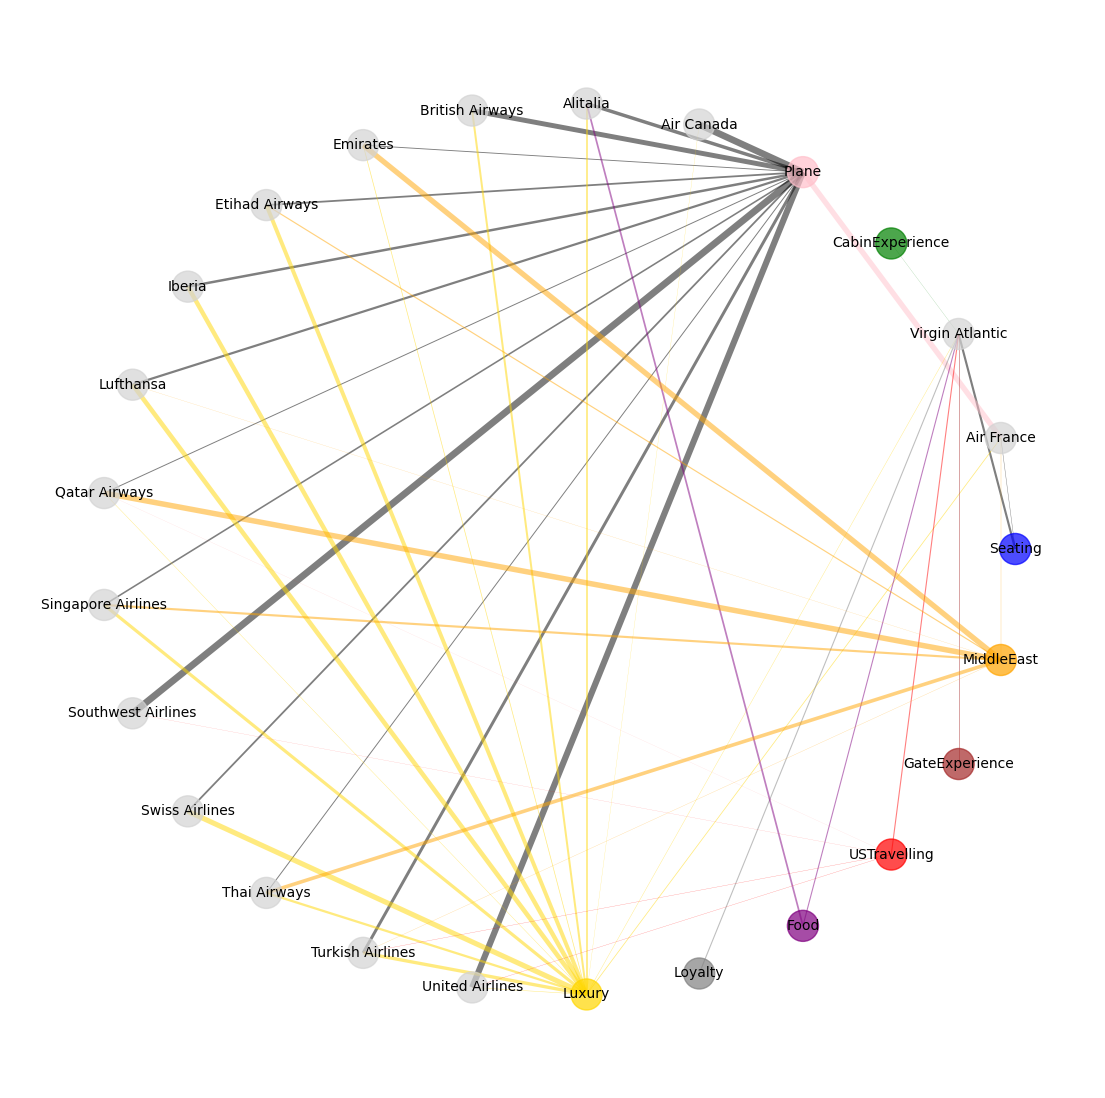

In [205]:

# Assuming testcirc_positive is a pandas DataFrame with the edge data for positive reviews
# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(testcirc_positive, 'from', 'to', edge_attr=True)

# Define the topic colors for positive topics
positive_topic_colors = {
    'Seating': 'blue',
    'Luxury': 'gold',
    'USTravelling': 'red',
    'CabinExperience': 'green',
    'Food': 'purple',
    'MiddleEast': 'orange',
    'Plane': 'pink',
    'GateExperience': 'brown',
    'Loyalty': 'gray'
}

# Define positions for the circular layout
pos = nx.circular_layout(G)

# Draw the nodes with the specified node colors for positive topics
node_color_list = [positive_topic_colors.get(node, 'lightgray') for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_color_list, alpha=0.7)

# Draw the edges, use the color for the target node from positive topics
for edge in G.edges(data=True):
    source, target, data = edge
    edge_color = positive_topic_colors.get(target, 'black')  # Default to black if not found in the dictionary
    nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=data['value']*5, alpha=0.5, edge_color=edge_color)

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Remove the axis
plt.axis('off')

# Set the plot size (optional)
plt.gcf().set_size_inches(14, 14)

# Show the plot
plt.show()
